# Table of Contents
 <p><div class="lev1"><a href="#Task-1.-European-unemployment-rates-according-to-eurostat"><span class="toc-item-num">Task 1.&nbsp;&nbsp;</span>European unemployment rates according to eurostat</a></div>
 <div class="lev1"><a href="#Task-2.-Unemployment-rates-in-Switzerland-according-to-amstat"><span class="toc-item-num">Task 2.&nbsp;&nbsp;</span>Unemployment rates in Switzerland according to amstat.</a></div>
 <div class="lev1"><a href="#Task-3.-Unemployment-rates-in-Switzerland-for-Swiss-and-foreign-workers-according-to-amstat"><span class="toc-item-num">Task 3.&nbsp;&nbsp;</span>Unemployment rates in Switzerland for Swiss and foreign workers according to amstat</a></div>

## Task 1. European unemployment rates according to eurostat

Go to the eurostat website and try to find a dataset that includes the european unemployment rates at a recent date.
<br> Use this data to build a Choropleth map which shows the unemployment rate in Europe at a country level. Think about the colors you use, how you decided to split the intervals into data classes or which interactions you could add in order to make the visualization intuitive and expressive.<br> Compare Switzerland's unemployment rate to that of the rest of Europe.

In [1]:
#importing libraries
import os
import pandas as pd
import json
import folium
import numpy as np

Read the json file with the data on the European countries' borders.

In [2]:
state_geo_path = r'topojson/europe.topojson.json'
geo_json_data = json.load(open(state_geo_path))

Load the dataset from the "eurostat" website providing information about unemployment rates in Europe. We chose this dataset because it includes the most recent unemployment stats, up to the second quarter of 2017.

In [3]:
state_unemployment = r'Data/lfsq_urgan_1_Data.csv'
state_data = pd.read_csv(state_unemployment)
state_data.head()

TIME                            GEO      SEX                  AGE  \
0  2015Q1  European Union (28 countries)    Total  From 15 to 74 years   
1  2015Q1  European Union (28 countries)    Males  From 15 to 74 years   
2  2015Q1  European Union (28 countries)  Females  From 15 to 74 years   
3  2015Q1  European Union (27 countries)    Total  From 15 to 74 years   
4  2015Q1  European Union (27 countries)    Males  From 15 to 74 years   

  CITIZEN        UNIT  Value Flag and Footnotes  
0   Total  Percentage   10.2                NaN  
1   Total  Percentage   10.2                NaN  
2   Total  Percentage   10.1                NaN  
3   Total  Percentage   10.1                NaN  
4   Total  Percentage   10.1                NaN

In order to show the unemployment rates in Europe at recent date we have to filter the information included in the dataset. We focus on the second quarter of 2017 which is the most recent data record for this year. Furthermore, we display the overall unemployment rate per country, hence, we ignore the values which depend on the gender and we keep only the 'Total' values.

In [4]:
total_rates = state_data.loc[np.logical_and(state_data.TIME=='2017Q2',state_data.SEX=='Total'), ['GEO', 'Value']]
total_rates.head()

GEO  Value
1053  European Union (28 countries)    7.6
1056  European Union (27 countries)    7.6
1059  European Union (15 countries)    8.2
1062       Euro area (19 countries)    9.0
1065       Euro area (18 countries)    9.0

In [5]:
#Change column names
total_rates.columns = ['Country', 'Percentage']
total_rates.head(1)

Country  Percentage
1053  European Union (28 countries)         7.6

It can be seen that after the initial filtering there are still entries in the dataset which we do not want to display. Furthermore, we check if the country names of the eurostat dataset match with the ones of the json file.

In [6]:
# eu_countries is a set with all the country names that are included in the json file 
eu_countries = set()
eu_list = geo_json_data['objects']['europe']['geometries'] 
for entry in eu_list:
    eu_countries.add(entry['properties']['NAME'])

# search for the countries which are in the dataset but not in the 'eu_countries' set of the json file 
position = 0
for name in total_rates['Country']:
    if name not in eu_countries:
        index = total_rates.index[total_rates['Country'] == name]
        print('Entry: ', name, 'at position', position, 'with index', index)
    position = position + 1

Entry:  European Union (28 countries) at position 0 with index Int64Index([1053], dtype='int64')
Entry:  European Union (27 countries) at position 1 with index Int64Index([1056], dtype='int64')
Entry:  European Union (15 countries) at position 2 with index Int64Index([1059], dtype='int64')
Entry:  Euro area (19 countries) at position 3 with index Int64Index([1062], dtype='int64')
Entry:  Euro area (18 countries) at position 4 with index Int64Index([1065], dtype='int64')
Entry:  Euro area (17 countries) at position 5 with index Int64Index([1068], dtype='int64')
Entry:  Germany (until 1990 former territory of the FRG) at position 10 with index Int64Index([1083], dtype='int64')
Entry:  Former Yugoslav Republic of Macedonia, the at position 37 with index Int64Index([1164], dtype='int64')


We observe that we do not need the first six entries and that there are two entries that are not incuded in the json file despite being European countries. We assume that the latter problem is caused by slight differences in their names. We will iterate through the names in the json file to check if these entries exist but are named differently.

In [7]:
for name in eu_countries:
    if ('Germany' in  name) or ('Macedonia' in name):
        print(name)

The former Yugoslav Republic of Macedonia
Germany


Our hypothesis was correct; these countries are included but they are named differently. We found the respective names just by searching with the keywords 'Germany' and 'Macedonia'. Finally, since the mistakes are very few and their position is known, we correct them manually.  

In [8]:
total_rates.drop(total_rates.index[:6], inplace=True)
total_rates.loc[1083, 'Country'] = 'Germany' 
total_rates.loc[1164, 'Country'] = 'The former Yugoslav Republic of Macedonia'

<h4>Plotting the map </h4> <br>
We choose the 'OrRd' color. The bright hue of red can depict successfully the negative impact of high unemployment rates. The default separation into equal intervals provide a comprehensible interpreation of the results.

In [9]:
eu_map = folium.Map([50,10], tiles='cartodbpositron', zoom_start=4)
eu_map.choropleth(geo_data=geo_json_data, data=total_rates,
              columns=['Country', 'Percentage'],
              key_on='feature.properties.NAME',
              fill_color='OrRd', fill_opacity=0.7, line_opacity=0.2,
              highlight=True,
              topojson='objects.europe')

eu_map

In [45]:
eu_map.save('./htmls/eu_map1.html')

In case the map doesn't display properly, please open the corresponding link clicking <a href="https://cdn.rawgit.com/jshwl/epfl-ada/master/Homework3/htmls/eu_map1.html">eu_map1</a>

We separate the countries which are not in the dataset by giving them the grey color.

In [10]:
unemployment_dict = total_rates.set_index('Country')['Percentage']
def my_color_function(feature):
    #grey color for the countries with no unemployment information
    if feature['properties']['NAME'] not in unemployment_dict.keys():
        return '#778899'   
    return

In [11]:
folium.TopoJson(
    geo_json_data,
    'objects.europe',
    style_function=lambda feature: {
        'fillColor': my_color_function(feature),
        'color' : 'None',
        'weight' : 2,
        'dashArray' : '5, 5'
        }
    ).add_to(eu_map)

eu_map

In [44]:
eu_map.save('./htmls/eu_map_final.html')

In case the map doesn't display properly, please open the corresponding link clicking <a href="https://cdn.rawgit.com/jshwl/epfl-ada/master/Homework3/htmls/eu_map_final.html">eu_map_final</a>

From the map if can be seen that Switzerland's unemployment rate is among the lowest in Europe.

## Task 2. Unemployment rates in Switzerland according to amstat

Go to the amstat website to find a dataset that includes the unemployment rates in Switzerland at a recent date.

Use this data to build another Choropleth map, this time showing the unemployment rate at the level of swiss cantons. Again, try to make the map as expressive as possible, and comment on the trends you observe.<br>

The Swiss Confederation defines the rates you have just plotted as the number of people looking for a job divided by the size of the active population (scaled by 100). This is surely a valid choice, but as we discussed one could argue for a different categorization.<br>

Copy the map you have just created, but this time don't count in your statistics people who already have a job and are looking for a new one. How do your observations change ? You can repeat this with different choices of categories to see how selecting different metrics can lead to different interpretations of the same data.

First we access the data on canton's borders from the topojson file

In [12]:
swiss_geo_path = r'topojson/ch-cantons.topojson.json'
geos_json_data = json.load(open(swiss_geo_path))

Secondly we get the data from the excel file containing the unemployment rates downloaded from the "amstat" website

In [13]:
swiss_df = pd.read_excel('Data/Tasso_disoccupazione.xlsx',header=1,skiprows=2)
swiss_df.head()

Unnamed: 0  Metriche  Tasso di disoccupazione  Disoccupati registrati  \
0     Zurigo       NaN                      3.3                   27225   
1      Berna       NaN                      2.4                   13658   
2    Lucerna       NaN                      1.7                    3885   
3        Uri       NaN                      0.6                     112   
4     Svitto       NaN                      1.7                    1455   

   Persone in cerca d'impiego non disoccupate  Tasso di disoccupazione.1  \
0                                        6931                        3.3   
1                                        4727                        2.4   
2                                        2871                        1.7   
3                                         145                        0.6   
4                                         774                        1.7   

   Disoccupati registrati.1  Persone in cerca d'impiego non disoccupate.1  
0                     27225                                          6931  
1                     13658                                          4727  
2                      3885                                          2871  
3                       112                                           145  
4                      1455                                           774

We translate the names of the columns we need from Italian to English and extract a dataframe containing only the values we need

In [14]:
swiss_df = swiss_df.rename(columns = {'Unnamed: 0':'Canton', 'Tasso di disoccupazione':'Unemployment_Rate', 'Disoccupati registrati':'Unemployed_Job_seekers','Persone in cerca d\'impiego non disoccupate':'Employed_Job_seekers'})
swiss_df = swiss_df.drop(swiss_df.columns[1], axis=1)
swiss_un_data = swiss_df[['Canton', 'Unemployment_Rate','Unemployed_Job_seekers','Employed_Job_seekers']].copy()

swiss_un_data.head()

Canton  Unemployment_Rate  Unemployed_Job_seekers  Employed_Job_seekers
0   Zurigo                3.3                   27225                  6931
1    Berna                2.4                   13658                  4727
2  Lucerna                1.7                    3885                  2871
3      Uri                0.6                     112                   145
4   Svitto                1.7                    1455                   774

We are going to compute all the values that we need for the map representaiton. <br> Amstat's unemployment rate is computed taking into account all job seekers (both already employed and unemployed). <br> We want to obtain the unemployment rate of unemployed job seekers. <br> In order to do so we use the following formula: <br>
adjusted_rate = unemployment_rate * Unemployed_Job_seekers / Total_Job_seekers

In [15]:
swiss_un_data['Total_Job_seekers'] = swiss_un_data['Unemployed_Job_seekers']+swiss_un_data['Employed_Job_seekers']
swiss_un_data['Adjusted_unemployment_rate'] = swiss_un_data['Unemployment_Rate']*swiss_un_data['Unemployed_Job_seekers'] / swiss_un_data['Total_Job_seekers']
swiss_un_data.head()

Canton  Unemployment_Rate  Unemployed_Job_seekers  Employed_Job_seekers  \
0   Zurigo                3.3                   27225                  6931   
1    Berna                2.4                   13658                  4727   
2  Lucerna                1.7                    3885                  2871   
3      Uri                0.6                     112                   145   
4   Svitto                1.7                    1455                   774   

   Total_Job_seekers  Adjusted_unemployment_rate  
0              34156                    2.630358  
1              18385                    1.782932  
2               6756                    0.977575  
3                257                    0.261479  
4               2229                    1.109690

The "amstat" website provides datasets in French, German, or Italian. In all these cases, the names of the cantons differ a lot from the ones in the json file. Therefore, we choose to create the unemployment maps according to IDs. For this reason we downloaded an excel file which includes the names of the cantons in italian and the relevant id.

In [16]:
italian_names_frame = pd.read_excel('Data/Targhe_svizzera.xlsx', header=None)
italian_names_frame.columns = ['ID', 'Canton']
italian_names_frame.head()

ID              Canton
0  AG             Argovia
1  AI  Appenzello Interno
2  AR  Appenzello Esterno
3  BE               Berna
4  BL    Basilea Campagna

We have to check if the names if the new files are also included in the ones we have stored in our dataset.

In [17]:
missing_cantons = set()
for name in italian_names_frame['Canton']:
    if name not in set(swiss_un_data['Canton']):
        missing_cantons.add(name)
    
missing_cantons

{'Basilea Campagna', 'Basilea Città', 'Nidvaldo', 'Obvaldo'}

We observe that four of the entries we want to use for mapping are missing. We have to check if this is because of slight differences in the names. We add a function which calculates the similirary of two strings and then we compare every missing value with the ones we have in our dataset. We set similarity threshold 0.8 which low enough for avoiding incorrect matching and high enough for checking for slight differences in the canton names.

In [18]:
from difflib import SequenceMatcher

def similarity(x, y):
    return SequenceMatcher(None, x, y).ratio()

In [19]:
#for every missing canton
for missing_name in missing_cantons:
    #for every canton in our dataset
    for name in set(swiss_un_data['Canton']):
        if similarity(missing_name, name) > 0.8:
            print(name, '-->', missing_name)

Basilea-Città --> Basilea Città
Obwaldo --> Obvaldo
Nidwaldo --> Nidvaldo
Basilea-Campagna --> Basilea Campagna


Our hypothesis was again correct. We change the values of our dataset according to new ones in order to avoid inaccuracies in the name-id mapping.

In [20]:
italian_names_frame.loc[italian_names_frame['Canton']=='Nidvaldo', 'Canton'] = 'Nidwaldo'
italian_names_frame.loc[italian_names_frame['Canton']=='Basilea Città', 'Canton'] = 'Basilea-Città'
italian_names_frame.loc[italian_names_frame['Canton']=='Obvaldo', 'Canton'] = 'Obwaldo'
italian_names_frame.loc[italian_names_frame['Canton']=='Basilea Campagna', 'Canton'] = 'Basilea-Campagna'

Now we merge the data applying inner-join, adding this way the new column "ID" to our data.

In [21]:
merged_data = pd.merge(swiss_un_data, italian_names_frame, how='inner', on='Canton', sort=True)
merged_data

Canton  Unemployment_Rate  Unemployed_Job_seekers  \
0   Appenzello Esterno                1.7                     523   
1   Appenzello Interno                0.7                      62   
2              Argovia                2.9                   10684   
3     Basilea-Campagna                2.8                    4082   
4        Basilea-Città                3.5                    3455   
5                Berna                2.4                   13658   
6             Friburgo                2.7                    4466   
7              Ginevra                5.2                   12234   
8                Giura                4.4                    1619   
9              Glarona                1.8                     416   
10            Grigioni                1.1                    1166   
11             Lucerna                1.7                    3885   
12           Neuchâtel                5.1                    4738   
13            Nidwaldo                1.0                     248   
14             Obwaldo                0.7                     153   
15           San Gallo                2.2                    6127   
16           Sciaffusa                3.0                    1286   
17             Soletta                2.6                    3801   
18              Svitto                1.7                    1455   
19              Ticino                3.1                    5202   
20            Turgovia                2.0                    3058   
21                 Uri                0.6                     112   
22             Vallese                2.8                    4816   
23                Vaud                4.3                   17155   
24                Zugo                2.3                    1543   
25              Zurigo                3.3                   27225   

    Employed_Job_seekers  Total_Job_seekers  Adjusted_unemployment_rate  ID  
0                    343                866                    1.026674  AR  
1                     40                102                    0.425490  AI  
2                   4461              15145                    2.045797  AG  
3                   1458               5540                    2.063105  BL  
4                   1713               5168                    2.339880  BS  
5                   4727              18385                    1.782932  BE  
6                   3371               7837                    1.538624  FR  
7                   3263              15497                    4.105104  GE  
8                    756               2375                    2.999411  JU  
9                    297                713                    1.050210  GL  
10                  1424               2590                    0.495212  GR  
11                  2871               6756                    0.977575  LU  
12                  1612               6350                    3.805323  NE  
13                   188                436                    0.568807  NW  
14                   166                319                    0.335737  OW  
15                  4236              10363                    1.300724  SG  
16                  1042               2328                    1.657216  SH  
17                  2827               6628                    1.491038  SO  
18                   774               2229                    1.109690  SZ  
19                  3473               8675                    1.858928  TI  
20                  2560               5618                    1.088644  TG  
21                   145                257                    0.261479  UR  
22                  3211               8027                    1.679930  VS  
23                  7494              24649                    2.992677  VD  
24                  1072               2615                    1.357132  ZG  
25                  6931              34156                    2.630358  ZH

Since we are going to use again the Canton - ID connection, it's useful to have this relationship in the dataframe italian_names_frame.  

<h4>Choropleth map showing the unemployment rate at the level of swiss cantons according to the Swiss Confederation definition.</h4><br> The unemployment rate is the number of people looking for a job divided by the size of the active population (scaled by 100). 

In [43]:
swiss_map = folium.Map([47,8], tiles='cartodbpositron', zoom_start=8)
swiss_map.choropleth(geo_data=geos_json_data, data=merged_data,
              columns=['ID', 'Unemployment_Rate'],
              key_on='feature.id',
              #threshold_scale=[3, 7, 11, 15, 19,  23],
              fill_color='OrRd', fill_opacity=0.7, line_opacity=0.2,
              highlight=True,
              topojson='objects.cantons')
swiss_map
swiss_map.save('./htmls/swiss_map0.html')

<h4>Choropleth map showing the unemployment rate without counting in our statistics people who already have a job and are looking for a new one.</h4>

In [23]:
swiss_map2 = folium.Map([47,8], tiles='cartodbpositron', zoom_start=8)
swiss_map2.choropleth(geo_data=geos_json_data, data=merged_data,
              columns=['ID', 'Adjusted_unemployment_rate'],
              key_on='feature.id',
              #threshold_scale=[3, 7, 11, 15, 19,  23],
              fill_color='OrRd', fill_opacity=0.7, line_opacity=0.2,
              highlight=True,
              topojson='objects.cantons')
swiss_map2

In [46]:
swiss_map.save('./htmls/swiss_map1.html')

In case the map doesn't display properly, please open the corresponding link clicking <a href="https://cdn.rawgit.com/jshwl/epfl-ada/master/Homework3/htmls/swiss_map1.html">swiss_map1</a>

By comparing the two maps just created, we observe that when we do not include people who already have a job in our statistics, the unemployment rate for some cantons is reduced (notice Soletta and San Gallo). We verify this way that it is very important to make clear what is included in the unemployment percentages shown in order to avoid wrong interpretations of the results.

## Task 3. Unemployment rates in Switzerland for Swiss and foreign workers according to amstat

1-Use the amstat website again to find a dataset that includes the unemployment rates in Switzerland at recent date, this time making a distinction between Swiss and foreign workers.<br> Show the difference in unemployment rates between the two categories in each canton on a Choropleth map.<br> Where are the differences most visible ? Why do you think that is ?

In this part we need to extract the data from the Swiss-Foreigners unemployment rates dataset and obtain a dataframe 

In [24]:
#First we store the data from the excel file into a dataframe
swiss_foreign = pd.read_excel('Data/Tasso_di_disoccupazione_nazionalita.xlsx',header=1,skiprows=2)

#Rename the relevant attributes
swiss_foreign = swiss_foreign.rename(columns = {'Unnamed: 0':'Canton', 'Unnamed: 1':'Nationality', 'Tasso di disoccupazione':'Unemployment_Rate'})
#Storing a dataframe containing only the information we need
swiss_fo = swiss_foreign[['Canton', 'Nationality', 'Unemployment_Rate']].copy()

swiss_fo.head()

Canton Nationality  Unemployment_Rate
0   Zurigo   stranieri                5.3
1   Zurigo    svizzeri                2.5
2    Berna   stranieri                5.5
3    Berna    svizzeri                1.8
4  Lucerna   stranieri                3.9

We need a dataframe having the unemployment rates for foreigners ("stranieri" in Italian) and Swiss ("Svizzeri") in two distinct columns, hence we split the swiss_fo dataframe into two parts and we recombine it into fo_sw.

In [25]:
foreign_df = swiss_fo[swiss_fo.Nationality == 'stranieri']
#foreign_df['Nationality'] = 'foreigners'
swiss_df = swiss_fo[swiss_fo.Nationality == 'svizzeri'] 
#swiss_df['Nationality'] = 'swiss'
fo_sw = pd.merge(foreign_df, swiss_df, on='Canton')
fo_sw.head()

Canton Nationality_x  Unemployment_Rate_x Nationality_y  \
0   Zurigo     stranieri                  5.3      svizzeri   
1    Berna     stranieri                  5.5      svizzeri   
2  Lucerna     stranieri                  3.9      svizzeri   
3      Uri     stranieri                  2.1      svizzeri   
4   Svitto     stranieri                  3.4      svizzeri   

   Unemployment_Rate_y  
0                  2.5  
1                  1.8  
2                  1.3  
3                  0.4  
4                  1.2

Now we are going to erase the Nationality attributes and rename Unemployment_Rate_x into foreign_unemployment_rate and Unemployment_Rate_y into swiss_unemployment_rate

In [26]:
fo_sw = fo_sw.rename(columns = {'Unemployment_Rate_x':'foreign_unemployment_rate', 'Unemployment_Rate_y':'swiss_unemployment_rate'})
fo_sw = fo_sw.drop(fo_sw.columns[[1,3]],axis=1)
fo_sw.head()

Canton  foreign_unemployment_rate  swiss_unemployment_rate
0   Zurigo                        5.3                      2.5
1    Berna                        5.5                      1.8
2  Lucerna                        3.9                      1.3
3      Uri                        2.1                      0.4
4   Svitto                        3.4                      1.2

To complete the fo_sw dataframe we need to add the ID column, so that we can bind the information from the geojson file into the map. In order to achieve this we exploit the italian_names_frame dataframe created few steps above.

In [27]:
complete_fo_sw = pd.merge(fo_sw, italian_names_frame, how='inner', on='Canton', sort=True)
complete_fo_sw.head()

Canton  foreign_unemployment_rate  swiss_unemployment_rate  ID
0  Appenzello Esterno                        3.4                      1.4  AR
1  Appenzello Interno                        2.0                      0.5  AI
2             Argovia                        5.6                      2.1  AG
3    Basilea-Campagna                        4.8                      2.2  BL
4       Basilea-Città                        4.6                      2.8  BS

Now in order to have a proper intervals, we obtain max and min values and make a linear colormap.

In [28]:
max_foreing = complete_fo_sw['foreign_unemployment_rate'].max()
min_foreign = complete_fo_sw['foreign_unemployment_rate'].min()
max_swiss = complete_fo_sw['swiss_unemployment_rate'].max()
min_swiss = complete_fo_sw['swiss_unemployment_rate'].min()

In [29]:
linear1 = folium.LinearColormap(['#fffacd','red'], vmin=min_foreign, vmax=max_foreing)
linear2 = folium.LinearColormap(['#fffacd','red'], vmin=min_swiss, vmax=max_swiss)
linear2

In [30]:
unemployment_dict1 = complete_fo_sw.set_index('ID')['foreign_unemployment_rate']
unemployment_dict2 = complete_fo_sw.set_index('ID')['swiss_unemployment_rate']

Display the map with layer control in order to show on the same map the values for foreigners and Swiss unemployment rates.

In [31]:
map1 = folium.Map([47,8], tiles='cartodbpositron', zoom_start=8)

folium.TopoJson(
    geos_json_data,
    'objects.cantons',
    style_function=lambda feature: {
        'fillColor': linear1(unemployment_dict1[feature['id']]),
        'color' : 'black',
        'weight' : 2,
        'dashArray' : '5, 5'
        },
    name='foreign_unemployment'
    ).add_to(map1)


folium.TopoJson(
    geos_json_data,
    'objects.cantons',
    style_function=lambda feature: {
        'fillColor': linear2(unemployment_dict2[feature['id']]),
        'color' : 'black',
        'weight' : 2,
        'dashArray' : '5, 5'
        },
    name='swiss_unemployment'
    ).add_to(map1)


folium.LayerControl().add_to(map1)
map1

In [41]:
map1.save('./htmls/swiss_map_final.html')

In case the map doesn't display properly, please open the corresponding link clicking <a href="https://cdn.rawgit.com/jshwl/epfl-ada/master/Homework3/htmls/swiss_map_final.html">swiss_map_final</a>

<h3> Analysis on the differences between age groups

2-Now let's refine the analysis by adding the differences between age groups. As you may have guessed it is nearly impossible to plot so many variables on a map.<br> Make a bar plot, which is a better suited visualization tool for this type of multivariate data.

Now we need to get the data from the "unemployment rate by age" dataset

In [32]:
rates_by_age = pd.read_excel('Data/Tasso_di_disoccupazione_gruppi.xlsx',header=1,skiprows=2)
rates_by_age = rates_by_age.rename(columns = {'Unnamed: 0':'Canton', 'Unnamed: 1':'Age_group', 'Tasso di disoccupazione':'Unemployment_Rate'})
rates_by_age = rates_by_age.drop(rates_by_age.columns[[2,3,5]],axis=1)
rates_by_age.head()
#Age groups: 
#1: 15-24
#2: 25-49
#3: 50+

Canton  Age_group  Unemployment_Rate
0  Zurigo        1.0                3.7
1  Zurigo        2.0                3.4
2  Zurigo        3.0                2.9
3   Berna        1.0                2.8
4   Berna        2.0                2.5

Now we split the rates_by_age datasets in 3 parts and re-combine them to have Canton as a unique key and the Age groups rates as columns (applying again the procedure seen in the previous point)

In [33]:
# Store 3 partial dataframes
group_1 = rates_by_age[rates_by_age.Age_group == 1.0]
group_2 = rates_by_age[rates_by_age.Age_group == 2.0]
group_3 = rates_by_age[rates_by_age.Age_group == 3.0]

# Building the final dataframe, merging 2 at a time  
age_groups_beta = pd.merge(group_1, group_2, on='Canton')

# Final recombineddataframe
age_groups = pd.merge(age_groups_beta, group_3, on='Canton')


age_groups = age_groups.rename(columns = {'Unemployment_Rate_x':'Unemployment15-24', 'Unemployment_Rate_y':'Unemployment25-49','Unemployment_Rate':'Unemployment50+'})

#Drop the unnecessary columns
age_groups = age_groups.drop(age_groups.columns[[1,3,5]],axis=1)
age_groups.head()

Canton  Unemployment15-24  Unemployment25-49  Unemployment50+
0   Zurigo                3.7                3.4              2.9
1    Berna                2.8                2.5              2.2
2  Lucerna                2.1                1.7              1.6
3      Uri                0.5                0.5              0.7
4   Svitto                1.6                1.6              1.9

Import libraries to plot and to set the style

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
sns.set_palette('cubehelix',3)

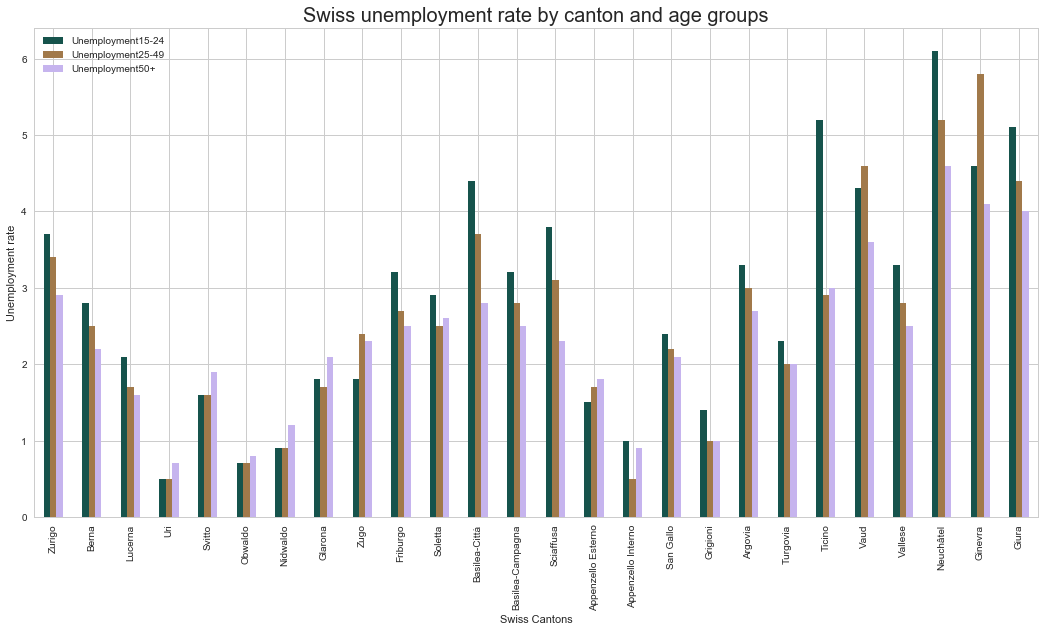

In [35]:
#Use cantons' name as index
age_groups = age_groups.set_index('Canton')

#plotting the cantons info
age_groups.plot.bar(figsize=(18,9))

plt.title('Swiss unemployment rate by canton and age groups',fontsize=20)
plt.ylabel('Unemployment rate')
plt.xlabel('Swiss Cantons')
plt.show()


## Task 4 - Bonus

Using the map you have just built, and the geographical information contained in it, could you give a rough estimate of the difference in unemployment rates between the areas divided by the Röstigraben?

Observing the map it appears clearly that German speaking regions of Switzerland enjoy lower unemployment rates compared to the French ones, and also the Italian Canton Ticino has a better rate than most of the French ones.